In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
class FunctionPlotter():
    def __init__(self,function,
    domain=0,CustomDomain=None,
    ticks=[np.linspace(-5,5,5),np.linspace(-5,5,5)],
    lim=[(-5,5),(-5,5)]):
        '''
        params: 
        function: the function to be plotted
        domain: the range of x 
                default: 0: [-5,5]
                1:[0,10]
                2:[-10,0]
                or other array like value of x
        '''
        self.function = function
        self.xticks, self.yticks = ticks[0],ticks[1]
        self.xlim,self.ylim = lim[0],lim[1]
        if domain == 0 :
            self.x = np.linspace(-5,5,101)
        elif domain == 1:
            self.x = np.linspace(0,10,101)
        elif domain == 2:
            self.x = np.linspace(-10,0,101)
        elif domain == 3:
            self.x = CustomDomain
    def canvas(self):
        self.fig,self.ax = plt.subplots()
        self.ax.spines["left"].set_position(("axes", 0.5))
        self.ax.spines["bottom"].set_position(("axes", 0.5))
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        #self.ax.plot(1, 0, ">k", transform=self.ax.get_yaxis_transform(), clip_on=False)
        #self.ax.plot(0, 1, "^k", transform=self.ax.get_xaxis_transform(), clip_on=False)
        self.ax.set_xlabel('x',x=1)
        self.ax.set_ylabel('y',y=1)
        self.ax.set_xticks(self.xticks)
        self.ax.set_yticks(self.yticks)
        self.ax.set_xlim(self.xlim)
        self.ax.set_ylim(self.ylim)
    def plot(self):
        self.y = self.function(self.x)
        self.canvas()
        self.ax.plot(self.x,self.y)
    def PlotMultiFunction(self):
        self.y = [function(self.x) for function in self.function]
        self.canvas()
        for i in range(len(self.function)):
            self.ax.plot(self.x,self.y[i],label='f({})'.format(i+1))
            self.ax.legend()
    def PlotContour(self):
        self.y = self.x
        X,Y = np.meshgrid(self.x,self.y)
        self.canvas()
        self.ax.contour(X,Y,f(X,Y),0)
    def PlotSequence(self):
        self.y = self.function(self.x)
        self.canvas()
        self.ax.scatter(self.x,self.y)

# Thomas Calculus
## Chapter 10 Infinite Sequences and Series
### 10.1 Sequences
#### Finding Terms of a Sequence
#### Finding a Sequence’s Formula
#### Convergence and Divergence
#### Recursively Defined Sequences
#### Theory and Examples
#### COMPUTER EXPLORATIONS
Use a CAS to perform the following steps for the sequences in Exercises 147–158.  
a. Calculate and then plot the first 25 terms of the sequence. Does the sequence appear to be bounded from above or below? Does it appear to converge or diverge? If it does converge, what is the limit $L$?  
b. If the sequence converges, find an integer $N$ such that $|a_n - L| \le 0.01$ for $n \ge N$. How far in the sequence do you have to get for the terms to lie within $0.0001$ of $L$?

147. $a_n = \sqrt[n]{n}$

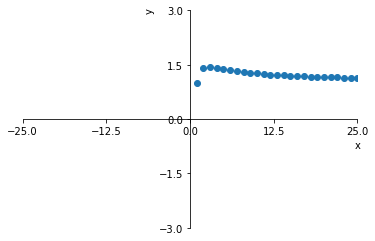

In [7]:
def f(x):
    return x**(1/x)  
FunctionPlotter(f,domain=3,CustomDomain=np.linspace(1,25,25),
    ticks=[np.linspace(-25,25,5),np.linspace(-3,3,5)],
    lim=[(-25,25),(-3,3)]).PlotSequence()

In [ ]:
plt.sca